# Neural Network (nn)

[Edward Lu](https://github.com/edwardlu71/notebooks)

### Linear Regression in 3 ways

#### Supervised Learning
the machine learning task of learning a function that maps an input to a desired output based on example input-output pairs.

1. Design model (input, output size, forward pass)
2. Construct loss and optimizer
3. Training loop
    - forward pass: compute prediction
    - backward pass: gradients
    - update weight


## Generation of sample data

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# 0) prepare data
# Be aware of data shapes: X_numpy is vertical arrary of arries with one element; y_numpy is horizental array
X_numpy, y_numpy, coef = datasets.make_regression(n_samples=100, #number of samples
                                                  n_features=1, #number of features
                                                  n_informative=1, #number of useful features
                                                  noise=20, #bias and standard deviation of the guassian noise
                                                  coef=True, #true coefficient used to generated the data
                                                  random_state=1)

In [3]:
# convert X_numpy to horizental array
x_numpy = X_numpy.T[0]

## Math of linear regression, traditonal method


In [4]:
# do a traditional linear regression

import math
# ddof = 1: sample variance  
#      = 0: population variance
ddof = 0
mean_x = np.mean(x_numpy)
mean_y = np.mean(y_numpy)
print("mean of x and y", mean_x, mean_y)
print("standard deviation of x and y", np.std(x_numpy, ddof=ddof), np.std(y_numpy, ddof=ddof))
var_x = np.var(x_numpy, ddof=ddof)
var_y = np.var(y_numpy, ddof=ddof)
print("variance of x and y", var_x, var_y)
print("cov matrix of x and y: \n", np.cov(x_numpy, y_numpy, ddof=ddof))
cov_xy = np.cov(x_numpy, y_numpy, ddof=ddof)[0,1]
print("cov(x,y) =  ", cov_xy)
print('correlate coefficient matrix of x and y: \n', np.corrcoef(x_numpy,y_numpy))
r_xy = np.corrcoef(x_numpy,y_numpy)[0,1] # always sample variance type
print("correlation coefficient(x,y) =  ", r_xy)
print("our own calculation of r_xy from variances: ", math.sqrt(cov_xy**2/var_x/var_y))

b = cov_xy/var_x
a = mean_y - b * mean_x

print("linear regression to line y = a + bx, where b = {}; a = {}".format(b, a))
np.correlate(x_numpy,y_numpy, mode='valid')

x_hat = np.linspace(X_numpy.min(), X_numpy.max(), 1000)
y_hat = a + b * x_hat

mean of x and y 0.060582852075698704 9.051174996815666
standard deviation of x and y 0.8851562138315849 75.25470813506942
variance of x and y 0.7835015228846666 5663.2710964944845
cov matrix of x and y: 
 [[7.83501523e-01 6.46267308e+01]
 [6.46267308e+01 5.66327110e+03]]
cov(x,y) =   64.62673081029031
correlate coefficient matrix of x and y: 
 [[1.         0.97019401]
 [0.97019401 1.        ]]
correlation coefficient(x,y) =   0.9701940104899215
our own calculation of r_xy from variances:  0.9701940104899212
linear regression to line y = a + bx, where b = 82.48449929280295; a = 4.054028777621711


Text(0.5, 1.0, 'samples and traditional linear regression')

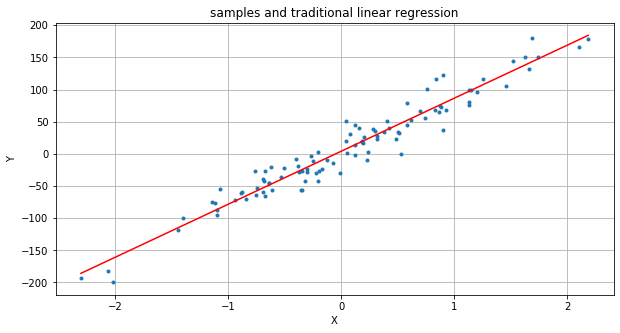

In [5]:
# plot the data and linear regression result
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

plt.ion() #interactive plot on
plt.grid(True)
plt.plot(X_numpy, y_numpy,'.',label='training data')
plt.plot(x_hat, y_hat, "r")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('samples and traditional linear regression')


## Use machine learning to do linear regression
- with model
- only one hidden layer 

In [6]:
import torch
import torch.nn as nn

In [7]:
# convert to tensors
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [8]:
# reshape y because y has only one row (1x100), we want each value in one row and the whole shape is one column (100x1)
y = y.view(y.shape[0], 1)

In [9]:
# we prepared only one feature of data. The feature has 100 data samples
n_samples, n_features = X.shape
print(n_samples, n_features)

100 1


In [10]:
# 1) model
input_size = n_features
output_size = n_features
model = nn.Linear(input_size, output_size)

In [11]:
# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss() # mean square error in this example
# SGD = stochastic gradient descent, instead of full data set it select some data calculation, saving cpu
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # for weights update

In [12]:
# 3) training loop
num_epochs = 1000

In [13]:
# run training epoch, expect loss stable and convergent
for epoch in range(num_epochs):
    # prediction = forward pass and loss
    y_predicted = model(X)
    # loss
    loss = criterion(y_predicted, y)

    # gradient = backward pass
    loss.backward() #dLoss/dWeight

    # update weights
    optimizer.step()

    # zero gradients, clean up
    optimizer.zero_grad()

    if epoch % 100 == 0:
        print(f"epoch {epoch}: loss = {loss.item():.4f}")

epoch 0: loss = 5615.7715
epoch 100: loss = 552.1051
epoch 200: loss = 342.1024
epoch 300: loss = 332.9890
epoch 400: loss = 332.5863
epoch 500: loss = 332.5685
epoch 600: loss = 332.5676
epoch 700: loss = 332.5676
epoch 800: loss = 332.5676
epoch 900: loss = 332.5676


In [14]:
# harvest the prediction from the trained model
predicted = model(X).detach().numpy()

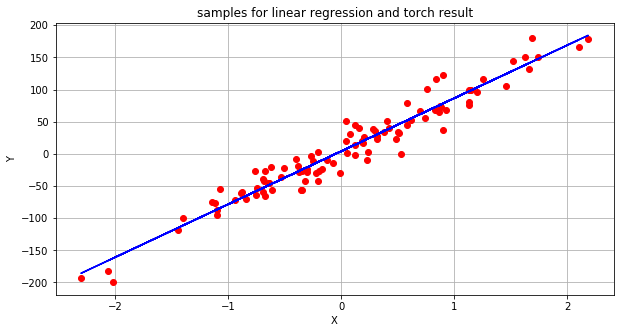

In [15]:
# plot the original data and training result
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

plt.ion() #interactive plot on
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('samples for linear regression and torch result')
plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted, "b")
plt.show()

## Sklearn

sklearn provided the supervise learning module for linear regression

In [16]:
# do a traditional linear regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_numpy.T[0][:, np.newaxis], y_numpy)
xfit = np.linspace(X_numpy.min(), X_numpy.max(), 1000)
yfit = lr_model.predict(xfit[:, np.newaxis])

Text(0.5, 1.0, 'samples for linear regression and result from sklearn module')

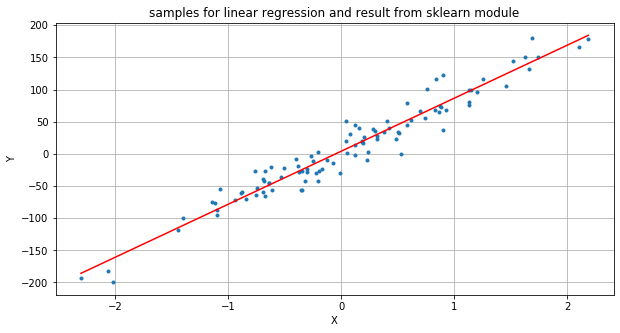

In [17]:
# plot the data and linear regression result
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

plt.ion() #interactive plot on
plt.grid(True)
plt.plot(X_numpy, y_numpy,'.',label='training data')
plt.plot(xfit, yfit, "r")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('samples for linear regression and result from sklearn module')